# Practical No.:-6

### Name:-Prachi Balaji Upare
### Roll No.:-2337055
### Batch.:- C
### Title:-Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve,f1_score,precision_score,recall_score,accuracy_score
import seaborn as sns
from sklearn import metrics

### Load Dataset 

In [2]:
data=pd.read_csv("IRIS.csv")

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Pre-Processing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.shape

(150, 5)

### train_test_split Model 

In [8]:
#Spliting the dataset in independent and dependent variables
X = data.iloc[:,:4].values
y = data['species'].values

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [10]:
#size of the models
print("Size of X_train:-",x_train.size)
print("Size of X_test:-",x_test.size)
print("Size of y_train:-",y_train.size)
print("Size of y_test:-",y_test.size)

Size of X_train:- 480
Size of X_test:- 120
Size of y_train:- 120
Size of y_test:- 30


In [11]:
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## GaussianNB

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
#model fitting
gaussianNB=GaussianNB()
gaussianNB.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred=gaussianNB.predict(x_test)

In [15]:
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [16]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["sepal_length","sepal_width","petal_length","petal_width","species","species_pred"])

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [17]:
gaussianNB.score(x_test,y_test)

0.9666666666666667

### Accuracy of GaussianNB 

In [18]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [19]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9666666666666667


In [20]:
c1_report=classification_report(y_test,y_pred)
print(c1_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
cm_df=pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                      columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

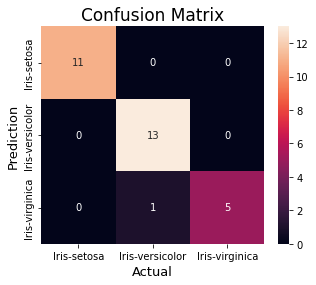

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## MultinomialNB

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
multinomial=MultinomialNB()

In [25]:
multinomial.fit(x_train,y_train)

MultinomialNB()

In [26]:
MUl_Y_Pred=multinomial.predict(x_test)

In [27]:
pd.DataFrame(np.c_[x_test,y_test,MUl_Y_Pred],columns=["sepal_length","sepal_width","petal_length","petal_width","species","species_pred"])

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-virginica
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-virginica
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-virginica
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-virginica


## Accuracy of MultinomialNB

In [28]:
multinomial.score(x_test,y_test)

0.5666666666666667

In [29]:
cm = confusion_matrix(y_test,MUl_Y_Pred)
cm

array([[11,  0,  0],
       [ 0,  0, 13],
       [ 0,  0,  6]], dtype=int64)

In [30]:
print ("Accuracy : ", accuracy_score(y_test, MUl_Y_Pred))

Accuracy :  0.5666666666666667


In [31]:
cm_df=pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                      columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

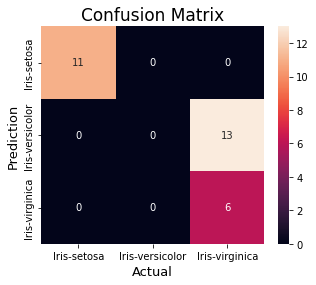

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## BernoulliNB 

In [33]:
from sklearn.naive_bayes import BernoulliNB

In [34]:
bernoulli=BernoulliNB()

In [35]:
bernoulli.fit(x_train,y_train)

BernoulliNB()

In [36]:
B_Y_Pred=bernoulli.predict(x_test)

In [37]:
print(B_Y_Pred)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [38]:
pd.DataFrame(np.c_[x_test,y_test,B_Y_Pred],columns=["sepal_length","sepal_width","petal_length","petal_width","species","species_pred"])

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-virginica
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-virginica
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-virginica
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-virginica
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-virginica
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-virginica
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-virginica


## Accuracy of BernoulliNB

In [39]:
bernoulli.score(x_test,y_test)

0.2

In [40]:
cm = confusion_matrix(y_test,B_Y_Pred)
cm

array([[ 0,  0, 11],
       [ 0,  0, 13],
       [ 0,  0,  6]], dtype=int64)

In [41]:
print ("Accuracy : ", accuracy_score(y_test, B_Y_Pred))

Accuracy :  0.2


In [42]:
cm_df=pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                      columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

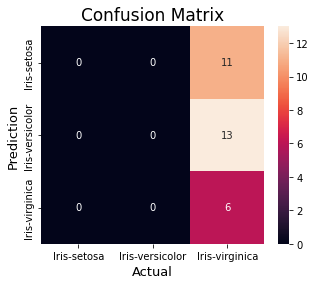

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, 
            annot=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()